In [97]:
from turbine.average_streamline.turbine import Turbine as TurbAvLine
from compressor.average_streamline.compressor import Compressor as CompAvLine
from gas_turbine_cycle.core.turbine_lib import Inlet, Outlet, Turbine, Compressor, CombustionChamber, Sink, Source, Load
import numpy as np 
import config
import os
import pickle
from variable_modes.compressor_characteristics.storage import From16To18Pi
from variable_modes.schemes import TwoShaftGeneratorVar1

# Загрузка данных расчета номинального режима

In [98]:
with open(os.path.join(config.output_dirname, config.cycle_results), 'rb') as f:
    units = pickle.load(f)[0]
    
comp_turb_cycle: Turbine = units['comp_turbine']
power_turb_cycle: Turbine = units['power_turbine']
inlet: Inlet = units['inlet']
outlet: Outlet = units['outlet']
comb_chamber: CombustionChamber = units['comb_chamber']
sink: Sink = units['sink']
source: Source = units['source']
comp_cycle: Compressor = units['compressor']
turb_load: Load = units['turb_load']

In [99]:
with open(os.path.join(config.output_dirname, 'comp_turbine_ave_line.avl'), 'rb') as f:
    comp_turb: TurbAvLine = pickle.load(f)['turbine']

with open(os.path.join(config.output_dirname, 'power_turbine_ave_line.avl'), 'rb') as f:
    power_turb: TurbAvLine = pickle.load(f)['turbine']

with open(os.path.join(config.output_dirname, 'compressor.comp'), 'rb') as f:
    compressor: CompAvLine = pickle.load(f)[0]

# Задание исходных данных

In [100]:
g_cool_st1 = comp_turb.first.G_cool / compressor.G
g_cool_st2 = comp_turb.last.G_cool / compressor.G
T_stag_in_arr=np.linspace(313, 233, 161)

plot_prefix = 'var_mode'

# максимальное превышение номинальной мощности
N_e_rel_excess = 0.20
# Параметры стандартной атмосферы
T_a = 288
p_a = 101325

1. Максимальное относительное превышение номинальной мощности - {{ str(round(N_e_rel_excess * 100)) }} %.
2. Стандартная атмосферная температура - {{ T_a }} К.
3. Стандартное атмосферное давление - {{ p_a }} Па.
4. Относительный расход на охлаждение первой ступени ТВД - {{ str(round(g_cool_st1, 3)) }}.
5. Относительный расход на охлаждение второй ступени ТВД - {{ str(round(g_cool_st2, 3)) }}.
6. Суммарный относительный расход утечек, охлаждающего воздуха и воздуха, отбираемого на прочие нужды - 
    {{ str(round(sink.g_cooling + sink.g_outflow, 3)) }}  

In [101]:
scheme = TwoShaftGeneratorVar1(
    inlet=inlet, compressor=comp_cycle, comp_turbine=comp_turb, 
    power_turbine=power_turb, comb_chamber=comb_chamber, outlet=outlet,
    p_stag_in=inlet.p_stag_in, T_a=T_a, p_a=p_a, G_nom=compressor.G, n_nom=compressor.n,
    g_cool_sum=sink.g_cooling + sink.g_outflow, 
    g_cool_st1=g_cool_st1, g_cool_st2=g_cool_st2, eta_r=power_turb_cycle.eta_r, 
    pi_c_stag_rel_init=0.95, n_norm_rel_init=0.95, 
    pi_t1_stag_init=1.75, pi_t2_stag_init=2.05, pi_t3_stag_init=3.8, comp_char=From16To18Pi(), 
    outlet_diff_coef=1.65, precision=0.0001,
    g_fuel_init=comb_chamber.g_fuel_prime * comb_chamber.g_in,
    T_stag_in_arr=T_stag_in_arr,
    N_e_max=turb_load.power + N_e_rel_excess * turb_load.power,
    T_g_stag=1523
)

In [102]:
scheme.solve()

Residual computing.

pi_c_stag_rel = 0.950
n_norm_rel = 0.950
pi_t1_stag = 1.75
pi_t2_stag = 2.05
pi_t3_stag = 3.80
g_fuel = 0.0187
T_stag_in = 313.00

G_t1_res = -3.966
G_t2_res = -3.048
G_t3_res = -7.366
L_res = 1414633.931
p_out_res = 11467.647

T_res = -35.334

Residual computing.

pi_c_stag_rel = 0.950
n_norm_rel = 0.950
pi_t1_stag = 1.75
pi_t2_stag = 2.05
pi_t3_stag = 3.80
g_fuel = 0.0187
T_stag_in = 313.00

G_t1_res = -3.966
G_t2_res = -3.048
G_t3_res = -7.366
L_res = 1414633.931
p_out_res = 11467.647

T_res = -35.334

Residual computing.

pi_c_stag_rel = 0.950
n_norm_rel = 0.950
pi_t1_stag = 1.75
pi_t2_stag = 2.05
pi_t3_stag = 3.80
g_fuel = 0.0187
T_stag_in = 313.00

G_t1_res = -3.966
G_t2_res = -3.048
G_t3_res = -7.366
L_res = 1414633.931
p_out_res = 11467.647

T_res = -35.334

Residual computing.

pi_c_stag_rel = 0.950
n_norm_rel = 0.950
pi_t1_stag = 1.75
pi_t2_stag = 2.05
pi_t3_stag = 3.80
g_fuel = 0.0187
T_stag_in = 313.00

G_t1_res = -3.966
G_t2_res = -3.048
G_t3_res = -7.

pi_t3_stag = 3.59
g_fuel = 0.0183
T_stag_in = 310.50

G_t1_res = 0.019
G_t2_res = 0.021
G_t3_res = 0.021
L_res = -17367.555
p_out_res = -2.989

T_res = 0.877

Residual computing.

pi_c_stag_rel = 0.873
n_norm_rel = 0.956
pi_t1_stag = 1.74
pi_t2_stag = 2.21
pi_t3_stag = 3.60
g_fuel = 0.0183
T_stag_in = 310.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = -14.825
p_out_res = -0.104

T_res = 0.001

Residual computing.

pi_c_stag_rel = 0.873
n_norm_rel = 0.956
pi_t1_stag = 1.74
pi_t2_stag = 2.21
pi_t3_stag = 3.60
g_fuel = 0.0183
T_stag_in = 310.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = 0.000
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 0.873
n_norm_rel = 0.956
pi_t1_stag = 1.74
pi_t2_stag = 2.21
pi_t3_stag = 3.60
g_fuel = 0.0183
T_stag_in = 310.50

G_t1_res = -0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = -0.000
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 0.873
n_norm_rel = 0.956
pi_t1_stag = 1.74



pi_c_stag_rel = 0.880
n_norm_rel = 0.958
pi_t1_stag = 1.74
pi_t2_stag = 2.21
pi_t3_stag = 3.63
g_fuel = 0.0184
T_stag_in = 308.50

G_t1_res = 0.019
G_t2_res = 0.021
G_t3_res = 0.021
L_res = -19238.859
p_out_res = -3.003

T_res = 0.914

Residual computing.

pi_c_stag_rel = 0.880
n_norm_rel = 0.958
pi_t1_stag = 1.74
pi_t2_stag = 2.21
pi_t3_stag = 3.63
g_fuel = 0.0184
T_stag_in = 308.50

G_t1_res = 0.019
G_t2_res = 0.021
G_t3_res = 0.021
L_res = -19238.685
p_out_res = -3.003

T_res = 0.914

Residual computing.

pi_c_stag_rel = 0.880
n_norm_rel = 0.958
pi_t1_stag = 1.74
pi_t2_stag = 2.21
pi_t3_stag = 3.63
g_fuel = 0.0184
T_stag_in = 308.50

G_t1_res = 0.019
G_t2_res = 0.021
G_t3_res = 0.021
L_res = -19238.817
p_out_res = -3.002

T_res = 0.914

Residual computing.

pi_c_stag_rel = 0.883
n_norm_rel = 0.959
pi_t1_stag = 1.74
pi_t2_stag = 2.21
pi_t3_stag = 3.64
g_fuel = 0.0184
T_stag_in = 308.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = -22.877
p_out_res = -0.122

T_res = 0.

T_res = 0.883

Residual computing.

pi_c_stag_rel = 0.893
n_norm_rel = 0.963
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.67
g_fuel = 0.0184
T_stag_in = 306.00

G_t1_res = 0.020
G_t2_res = 0.022
G_t3_res = 0.022
L_res = -18136.040
p_out_res = -3.186

T_res = 0.883

Residual computing.

pi_c_stag_rel = 0.895
n_norm_rel = 0.964
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.68
g_fuel = 0.0184
T_stag_in = 306.00

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = -24.043
p_out_res = -0.114

T_res = 0.001

Residual computing.

pi_c_stag_rel = 0.895
n_norm_rel = 0.964
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.68
g_fuel = 0.0184
T_stag_in = 306.00

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = -0.026
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 0.895
n_norm_rel = 0.964
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.68
g_fuel = 0.0184
T_stag_in = 306.00

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = 0.000
L_res = -0.000


G_t1_res = 0.020
G_t2_res = 0.022
G_t3_res = 0.023
L_res = -18507.342
p_out_res = -3.280

T_res = 0.887

Residual computing.

pi_c_stag_rel = 0.903
n_norm_rel = 0.966
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.71
g_fuel = 0.0184
T_stag_in = 304.00

G_t1_res = 0.020
G_t2_res = 0.022
G_t3_res = 0.023
L_res = -18507.163
p_out_res = -3.280

T_res = 0.887

Residual computing.

pi_c_stag_rel = 0.903
n_norm_rel = 0.966
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.71
g_fuel = 0.0184
T_stag_in = 304.00

G_t1_res = 0.020
G_t2_res = 0.022
G_t3_res = 0.023
L_res = -18507.300
p_out_res = -3.279

T_res = 0.887

Residual computing.

pi_c_stag_rel = 0.906
n_norm_rel = 0.967
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.72
g_fuel = 0.0184
T_stag_in = 304.00

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = -20.954
p_out_res = -0.115

T_res = 0.001

Residual computing.

pi_c_stag_rel = 0.906
n_norm_rel = 0.967
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.72
g_fuel = 0.

n_norm_rel = 0.971
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.76
g_fuel = 0.0185
T_stag_in = 301.50

G_t1_res = 0.021
G_t2_res = 0.023
G_t3_res = 0.023
L_res = -18985.238
p_out_res = -3.402

T_res = 0.891

Residual computing.

pi_c_stag_rel = 0.916
n_norm_rel = 0.971
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.76
g_fuel = 0.0185
T_stag_in = 301.50

G_t1_res = 0.021
G_t2_res = 0.023
G_t3_res = 0.023
L_res = -18985.248
p_out_res = -3.402

T_res = 0.891

Residual computing.

pi_c_stag_rel = 0.916
n_norm_rel = 0.971
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.76
g_fuel = 0.0185
T_stag_in = 301.50

G_t1_res = 0.021
G_t2_res = 0.023
G_t3_res = 0.023
L_res = -18985.067
p_out_res = -3.402

T_res = 0.891

Residual computing.

pi_c_stag_rel = 0.916
n_norm_rel = 0.971
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.76
g_fuel = 0.0185
T_stag_in = 301.50

G_t1_res = 0.021
G_t2_res = 0.023
G_t3_res = 0.023
L_res = -18985.206
p_out_res = -3.400

T_res = 0.891

Residual comput

L_res = -19382.585
p_out_res = -3.504

T_res = 0.895

Residual computing.

pi_c_stag_rel = 0.927
n_norm_rel = 0.975
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.80
g_fuel = 0.0185
T_stag_in = 299.50

G_t1_res = 0.021
G_t2_res = 0.023
G_t3_res = 0.024
L_res = -19382.594
p_out_res = -3.504

T_res = 0.895

Residual computing.

pi_c_stag_rel = 0.927
n_norm_rel = 0.975
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.80
g_fuel = 0.0185
T_stag_in = 299.50

G_t1_res = 0.021
G_t2_res = 0.023
G_t3_res = 0.024
L_res = -19382.412
p_out_res = -3.504

T_res = 0.895

Residual computing.

pi_c_stag_rel = 0.927
n_norm_rel = 0.975
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.80
g_fuel = 0.0185
T_stag_in = 299.50

G_t1_res = 0.021
G_t2_res = 0.023
G_t3_res = 0.024
L_res = -19382.552
p_out_res = -3.503

T_res = 0.895

Residual computing.

pi_c_stag_rel = 0.930
n_norm_rel = 0.976
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.81
g_fuel = 0.0185
T_stag_in = 299.50

G_t1_res = 0.000
G_t2_r

L_res = -19895.564
p_out_res = -3.638

T_res = 0.899

Residual computing.

pi_c_stag_rel = 0.941
n_norm_rel = 0.980
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.85
g_fuel = 0.0186
T_stag_in = 297.00

G_t1_res = 0.022
G_t2_res = 0.024
G_t3_res = 0.024
L_res = -19895.838
p_out_res = -3.639

T_res = 0.899

Residual computing.

pi_c_stag_rel = 0.941
n_norm_rel = 0.980
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.85
g_fuel = 0.0186
T_stag_in = 297.00

G_t1_res = 0.022
G_t2_res = 0.024
G_t3_res = 0.024
L_res = -19895.848
p_out_res = -3.639

T_res = 0.899

Residual computing.

pi_c_stag_rel = 0.941
n_norm_rel = 0.980
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.85
g_fuel = 0.0186
T_stag_in = 297.00

G_t1_res = 0.022
G_t2_res = 0.024
G_t3_res = 0.024
L_res = -19895.663
p_out_res = -3.639

T_res = 0.899

Residual computing.

pi_c_stag_rel = 0.941
n_norm_rel = 0.980
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.85
g_fuel = 0.0186
T_stag_in = 297.00

G_t1_res = 0.022
G_t2_r

pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.89
g_fuel = 0.0186
T_stag_in = 295.00

G_t1_res = 0.022
G_t2_res = 0.024
G_t3_res = 0.025
L_res = -20320.143
p_out_res = -3.750

T_res = 0.903

Residual computing.

pi_c_stag_rel = 0.953
n_norm_rel = 0.984
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.89
g_fuel = 0.0186
T_stag_in = 295.00

G_t1_res = 0.022
G_t2_res = 0.024
G_t3_res = 0.025
L_res = -20320.160
p_out_res = -3.752

T_res = 0.903

Residual computing.

pi_c_stag_rel = 0.953
n_norm_rel = 0.984
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.89
g_fuel = 0.0186
T_stag_in = 295.00

G_t1_res = 0.022
G_t2_res = 0.024
G_t3_res = 0.025
L_res = -20320.423
p_out_res = -3.753

T_res = 0.903

Residual computing.

pi_c_stag_rel = 0.953
n_norm_rel = 0.984
pi_t1_stag = 1.74
pi_t2_stag = 2.22
pi_t3_stag = 3.89
g_fuel = 0.0186
T_stag_in = 295.00

G_t1_res = 0.022
G_t2_res = 0.024
G_t3_res = 0.025
L_res = -20320.433
p_out_res = -3.753

T_res = 0.903

Residual computing.

pi_c_stag_rel

g_fuel = 0.0186
T_stag_in = 293.00

G_t1_res = 0.000
G_t2_res = -0.000
G_t3_res = 0.000
L_res = 0.000
p_out_res = 0.000

T_res = -0.000

Residual computing.

pi_c_stag_rel = 0.968
n_norm_rel = 0.989
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 3.94
g_fuel = 0.0186
T_stag_in = 292.50

G_t1_res = 0.023
G_t2_res = 0.025
G_t3_res = 0.026
L_res = -20871.925
p_out_res = -3.901

T_res = 0.908

Residual computing.

pi_c_stag_rel = 0.968
n_norm_rel = 0.989
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 3.94
g_fuel = 0.0186
T_stag_in = 292.50

G_t1_res = 0.023
G_t2_res = 0.025
G_t3_res = 0.026
L_res = -20871.925
p_out_res = -3.901

T_res = 0.908

Residual computing.

pi_c_stag_rel = 0.968
n_norm_rel = 0.989
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 3.94
g_fuel = 0.0186
T_stag_in = 292.50

G_t1_res = 0.023
G_t2_res = 0.025
G_t3_res = 0.026
L_res = -20871.925
p_out_res = -3.901

T_res = 0.908

Residual computing.

pi_c_stag_rel = 0.968
n_norm_rel = 0.989
pi_t1_stag = 1.74
pi_t2_stag =

pi_c_stag_rel = 0.980
n_norm_rel = 0.993
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 3.99
g_fuel = 0.0187
T_stag_in = 291.00

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = -41.164
p_out_res = -0.144

T_res = 0.002

Residual computing.

pi_c_stag_rel = 0.980
n_norm_rel = 0.993
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 3.99
g_fuel = 0.0187
T_stag_in = 291.00

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = -0.093
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 0.980
n_norm_rel = 0.993
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 3.99
g_fuel = 0.0187
T_stag_in = 291.00

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = 0.000
L_res = -0.000
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 0.980
n_norm_rel = 0.993
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 3.99
g_fuel = 0.0187
T_stag_in = 290.50

G_t1_res = 0.023
G_t2_res = 0.026
G_t3_res = 0.026
L_res = -21324.763
p_out_res = -4.027

T_res = 0.911

R


G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -29.219
p_out_res = 0.005

T_res = 0.001

Residual computing.

pi_c_stag_rel = 0.995
n_norm_rel = 0.999
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.04
g_fuel = 0.0187
T_stag_in = 288.50

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -0.034
p_out_res = 0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 0.995
n_norm_rel = 0.999
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.04
g_fuel = 0.0187
T_stag_in = 288.50

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -0.000
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 0.995
n_norm_rel = 0.999
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.04
g_fuel = 0.0187
T_stag_in = 288.00

G_t1_res = 0.024
G_t2_res = 0.026
G_t3_res = 0.027
L_res = -21914.518
p_out_res = -4.193

T_res = 0.916

Residual computing.

pi_c_stag_rel = 0.995
n_norm_rel = 0.999
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.04
g_fuel = 0.


G_t1_res = 0.024
G_t2_res = 0.027
G_t3_res = 0.027
L_res = -22238.550
p_out_res = -4.285

T_res = 0.919

Residual computing.

pi_c_stag_rel = 1.003
n_norm_rel = 1.002
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.07
g_fuel = 0.0187
T_stag_in = 286.50

G_t1_res = 0.024
G_t2_res = 0.027
G_t3_res = 0.027
L_res = -22238.559
p_out_res = -4.285

T_res = 0.919

Residual computing.

pi_c_stag_rel = 1.003
n_norm_rel = 1.002
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.07
g_fuel = 0.0187
T_stag_in = 286.50

G_t1_res = 0.024
G_t2_res = 0.027
G_t3_res = 0.027
L_res = -22238.363
p_out_res = -4.285

T_res = 0.919

Residual computing.

pi_c_stag_rel = 1.003
n_norm_rel = 1.002
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.07
g_fuel = 0.0187
T_stag_in = 286.50

G_t1_res = 0.024
G_t2_res = 0.027
G_t3_res = 0.027
L_res = -22238.514
p_out_res = -4.283

T_res = 0.919

Residual computing.

pi_c_stag_rel = 1.006
n_norm_rel = 1.003
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.08
g_fuel 

pi_c_stag_rel = 1.015
n_norm_rel = 1.008
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.11
g_fuel = 0.0188
T_stag_in = 284.00

G_t1_res = 0.025
G_t2_res = 0.027
G_t3_res = 0.028
L_res = -22749.413
p_out_res = -4.425

T_res = 0.924

Residual computing.

pi_c_stag_rel = 1.015
n_norm_rel = 1.008
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.11
g_fuel = 0.0188
T_stag_in = 284.00

G_t1_res = 0.025
G_t2_res = 0.027
G_t3_res = 0.028
L_res = -22749.566
p_out_res = -4.423

T_res = 0.924

Residual computing.

pi_c_stag_rel = 1.017
n_norm_rel = 1.009
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.12
g_fuel = 0.0188
T_stag_in = 284.00

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = 35.953
p_out_res = -0.080

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.017
n_norm_rel = 1.009
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.12
g_fuel = 0.0188
T_stag_in = 284.00

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = -0.103
p_out_res = 0.000

T_res = 0.000

R

pi_t2_stag = 2.23
pi_t3_stag = 4.14
g_fuel = 0.0188
T_stag_in = 282.00

G_t1_res = 0.025
G_t2_res = 0.028
G_t3_res = 0.028
L_res = -23169.050
p_out_res = -4.541

T_res = 0.928

Residual computing.

pi_c_stag_rel = 1.024
n_norm_rel = 1.012
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.14
g_fuel = 0.0188
T_stag_in = 282.00

G_t1_res = 0.025
G_t2_res = 0.028
G_t3_res = 0.028
L_res = -23169.205
p_out_res = -4.539

T_res = 0.928

Residual computing.

pi_c_stag_rel = 1.026
n_norm_rel = 1.013
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.15
g_fuel = 0.0188
T_stag_in = 282.00

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = 36.963
p_out_res = -0.081

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.026
n_norm_rel = 1.013
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.15
g_fuel = 0.0188
T_stag_in = 282.00

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = -0.107
p_out_res = 0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.026
n_norm_rel = 1.01

G_t3_res = 0.029
L_res = -23707.561
p_out_res = -4.692

T_res = 0.933

Residual computing.

pi_c_stag_rel = 1.036
n_norm_rel = 1.018
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.19
g_fuel = 0.0189
T_stag_in = 279.50

G_t1_res = 0.026
G_t2_res = 0.028
G_t3_res = 0.029
L_res = -23707.719
p_out_res = -4.691

T_res = 0.933

Residual computing.

pi_c_stag_rel = 1.038
n_norm_rel = 1.019
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.19
g_fuel = 0.0189
T_stag_in = 279.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = 38.272
p_out_res = -0.083

T_res = -0.000

Residual computing.

pi_c_stag_rel = 1.038
n_norm_rel = 1.019
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.19
g_fuel = 0.0189
T_stag_in = 279.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = -0.111
p_out_res = 0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.038
n_norm_rel = 1.019
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.19
g_fuel = 0.0189
T_stag_in = 279.50

G_t1_res = 0.

n_norm_rel = 1.023
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.22
g_fuel = 0.0189
T_stag_in = 277.50

G_t1_res = 0.026
G_t2_res = 0.029
G_t3_res = 0.029
L_res = -24149.905
p_out_res = -4.818

T_res = 0.937

Residual computing.

pi_c_stag_rel = 1.045
n_norm_rel = 1.023
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.22
g_fuel = 0.0189
T_stag_in = 277.50

G_t1_res = 0.026
G_t2_res = 0.029
G_t3_res = 0.029
L_res = -24150.064
p_out_res = -4.817

T_res = 0.937

Residual computing.

pi_c_stag_rel = 1.048
n_norm_rel = 1.024
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.23
g_fuel = 0.0189
T_stag_in = 277.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = 39.351
p_out_res = -0.085

T_res = -0.000

Residual computing.

pi_c_stag_rel = 1.048
n_norm_rel = 1.024
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 4.23
g_fuel = 0.0189
T_stag_in = 277.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = -0.115
p_out_res = 0.000

T_res = 0.000

Residual computing.

p

G_t2_res = 0.029
G_t3_res = 0.030
L_res = -24717.762
p_out_res = -4.980

T_res = 0.942

Residual computing.

pi_c_stag_rel = 1.057
n_norm_rel = 1.029
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.26
g_fuel = 0.0190
T_stag_in = 275.00

G_t1_res = 0.027
G_t2_res = 0.029
G_t3_res = 0.030
L_res = -24717.662
p_out_res = -4.979

T_res = 0.942

Residual computing.

pi_c_stag_rel = 1.057
n_norm_rel = 1.029
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.26
g_fuel = 0.0190
T_stag_in = 275.00

G_t1_res = 0.027
G_t2_res = 0.029
G_t3_res = 0.030
L_res = -24717.555
p_out_res = -4.980

T_res = 0.942

Residual computing.

pi_c_stag_rel = 1.057
n_norm_rel = 1.029
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.26
g_fuel = 0.0190
T_stag_in = 275.00

G_t1_res = 0.027
G_t2_res = 0.029
G_t3_res = 0.030
L_res = -24717.959
p_out_res = -4.982

T_res = 0.942

Residual computing.

pi_c_stag_rel = 1.057
n_norm_rel = 1.029
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.26
g_fuel = 0.0190
T_stag_in


T_res = 0.946

Residual computing.

pi_c_stag_rel = 1.067
n_norm_rel = 1.033
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.30
g_fuel = 0.0190
T_stag_in = 273.00

G_t1_res = 0.027
G_t2_res = 0.030
G_t3_res = 0.031
L_res = -25184.382
p_out_res = -5.117

T_res = 0.946

Residual computing.

pi_c_stag_rel = 1.067
n_norm_rel = 1.033
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.30
g_fuel = 0.0190
T_stag_in = 273.00

G_t1_res = 0.027
G_t2_res = 0.030
G_t3_res = 0.031
L_res = -25184.382
p_out_res = -5.117

T_res = 0.946

Residual computing.

pi_c_stag_rel = 1.067
n_norm_rel = 1.033
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.30
g_fuel = 0.0190
T_stag_in = 273.00

G_t1_res = 0.027
G_t2_res = 0.030
G_t3_res = 0.031
L_res = -25184.282
p_out_res = -5.115

T_res = 0.946

Residual computing.

pi_c_stag_rel = 1.067
n_norm_rel = 1.033
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.30
g_fuel = 0.0190
T_stag_in = 273.00

G_t1_res = 0.027
G_t2_res = 0.030
G_t3_res = 0.031
L_res = -2

T_res = 0.951

Residual computing.

pi_c_stag_rel = 1.080
n_norm_rel = 1.039
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.34
g_fuel = 0.0190
T_stag_in = 270.50

G_t1_res = 0.028
G_t2_res = 0.031
G_t3_res = 0.031
L_res = -25783.410
p_out_res = -5.294

T_res = 0.951

Residual computing.

pi_c_stag_rel = 1.080
n_norm_rel = 1.039
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.34
g_fuel = 0.0190
T_stag_in = 270.50

G_t1_res = 0.028
G_t2_res = 0.031
G_t3_res = 0.031
L_res = -25783.827
p_out_res = -5.296

T_res = 0.951

Residual computing.

pi_c_stag_rel = 1.080
n_norm_rel = 1.039
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.34
g_fuel = 0.0190
T_stag_in = 270.50

G_t1_res = 0.028
G_t2_res = 0.031
G_t3_res = 0.031
L_res = -25783.835
p_out_res = -5.296

T_res = 0.951

Residual computing.

pi_c_stag_rel = 1.080
n_norm_rel = 1.039
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.34
g_fuel = 0.0190
T_stag_in = 270.50

G_t1_res = 0.028
G_t2_res = 0.031
G_t3_res = 0.031
L_res = -25

T_res = 0.956

Residual computing.

pi_c_stag_rel = 1.090
n_norm_rel = 1.044
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.38
g_fuel = 0.0191
T_stag_in = 268.50

G_t1_res = 0.028
G_t2_res = 0.031
G_t3_res = 0.032
L_res = -26276.224
p_out_res = -5.442

T_res = 0.956

Residual computing.

pi_c_stag_rel = 1.090
n_norm_rel = 1.044
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.38
g_fuel = 0.0191
T_stag_in = 268.50

G_t1_res = 0.028
G_t2_res = 0.031
G_t3_res = 0.032
L_res = -26276.123
p_out_res = -5.440

T_res = 0.956

Residual computing.

pi_c_stag_rel = 1.090
n_norm_rel = 1.044
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.38
g_fuel = 0.0191
T_stag_in = 268.50

G_t1_res = 0.028
G_t2_res = 0.031
G_t3_res = 0.032
L_res = -26276.004
p_out_res = -5.442

T_res = 0.956

Residual computing.

pi_c_stag_rel = 1.090
n_norm_rel = 1.044
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.38
g_fuel = 0.0191
T_stag_in = 268.50

G_t1_res = 0.028
G_t2_res = 0.031
G_t3_res = 0.032
L_res = -26

n_norm_rel = 1.050
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.42
g_fuel = 0.0191
T_stag_in = 266.00

G_t1_res = 0.029
G_t2_res = 0.032
G_t3_res = 0.033
L_res = -26908.849
p_out_res = -5.635

T_res = 0.961

Residual computing.

pi_c_stag_rel = 1.103
n_norm_rel = 1.050
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.42
g_fuel = 0.0191
T_stag_in = 266.00

G_t1_res = 0.029
G_t2_res = 0.032
G_t3_res = 0.033
L_res = -26909.279
p_out_res = -5.637

T_res = 0.961

Residual computing.

pi_c_stag_rel = 1.103
n_norm_rel = 1.050
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.42
g_fuel = 0.0191
T_stag_in = 266.00

G_t1_res = 0.029
G_t2_res = 0.032
G_t3_res = 0.033
L_res = -26909.288
p_out_res = -5.637

T_res = 0.961

Residual computing.

pi_c_stag_rel = 1.103
n_norm_rel = 1.050
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.42
g_fuel = 0.0191
T_stag_in = 266.00

G_t1_res = 0.029
G_t2_res = 0.032
G_t3_res = 0.033
L_res = -26909.074
p_out_res = -5.637

T_res = 0.961

Residual comput

pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.46
g_fuel = 0.0192
T_stag_in = 264.00

G_t1_res = 0.029
G_t2_res = 0.033
G_t3_res = 0.033
L_res = -27429.617
p_out_res = -5.796

T_res = 0.966

Residual computing.

pi_c_stag_rel = 1.113
n_norm_rel = 1.055
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.46
g_fuel = 0.0192
T_stag_in = 264.00

G_t1_res = 0.029
G_t2_res = 0.033
G_t3_res = 0.033
L_res = -27429.517
p_out_res = -5.794

T_res = 0.966

Residual computing.

pi_c_stag_rel = 1.113
n_norm_rel = 1.055
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.46
g_fuel = 0.0192
T_stag_in = 264.00

G_t1_res = 0.029
G_t2_res = 0.033
G_t3_res = 0.033
L_res = -27429.387
p_out_res = -5.796

T_res = 0.966

Residual computing.

pi_c_stag_rel = 1.113
n_norm_rel = 1.055
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.46
g_fuel = 0.0192
T_stag_in = 264.00

G_t1_res = 0.029
G_t2_res = 0.033
G_t3_res = 0.033
L_res = -27429.825
p_out_res = -5.797

T_res = 0.966

Residual computing.

pi_c_stag_rel


Residual computing.

pi_c_stag_rel = 1.127
n_norm_rel = 1.062
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.51
g_fuel = 0.0192
T_stag_in = 261.50

G_t1_res = 0.030
G_t2_res = 0.033
G_t3_res = 0.034
L_res = -28968.491
p_out_res = -5.954

T_res = 0.987

Residual computing.

pi_c_stag_rel = 1.127
n_norm_rel = 1.062
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.51
g_fuel = 0.0192
T_stag_in = 261.50

G_t1_res = 0.030
G_t2_res = 0.033
G_t3_res = 0.034
L_res = -28968.491
p_out_res = -5.954

T_res = 0.987

Residual computing.

pi_c_stag_rel = 1.127
n_norm_rel = 1.062
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.51
g_fuel = 0.0192
T_stag_in = 261.50

G_t1_res = 0.030
G_t2_res = 0.033
G_t3_res = 0.034
L_res = -28968.399
p_out_res = -5.952

T_res = 0.987

Residual computing.

pi_c_stag_rel = 1.127
n_norm_rel = 1.062
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.51
g_fuel = 0.0192
T_stag_in = 261.50

G_t1_res = 0.030
G_t2_res = 0.033
G_t3_res = 0.034
L_res = -28968.233
p_out_

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = -0.156
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.138
n_norm_rel = 1.067
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.54
g_fuel = 0.0192
T_stag_in = 260.00

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = -0.000
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.138
n_norm_rel = 1.067
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.54
g_fuel = 0.0192
T_stag_in = 259.50

G_t1_res = 0.030
G_t2_res = 0.034
G_t3_res = 0.034
L_res = -29533.639
p_out_res = -6.129

T_res = 0.991

Residual computing.

pi_c_stag_rel = 1.138
n_norm_rel = 1.067
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.54
g_fuel = 0.0192
T_stag_in = 259.50

G_t1_res = 0.030
G_t2_res = 0.034
G_t3_res = 0.034
L_res = -29533.639
p_out_res = -6.129

T_res = 0.991

Residual computing.

pi_c_stag_rel = 1.138
n_norm_rel = 1.067
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.54
g_fuel = 0.0192

n_norm_rel = 1.071
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.58
g_fuel = 0.0193
T_stag_in = 258.00

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = 0.000
L_res = -0.000
p_out_res = -0.000

N_e_res = 0.000

Residual computing.

pi_c_stag_rel = 1.147
n_norm_rel = 1.071
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.58
g_fuel = 0.0193
T_stag_in = 257.50

G_t1_res = 0.031
G_t2_res = 0.035
G_t3_res = 0.035
L_res = -29151.732
p_out_res = -6.344

T_res = 2.390

Residual computing.

pi_c_stag_rel = 1.147
n_norm_rel = 1.071
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.58
g_fuel = 0.0193
T_stag_in = 257.50

G_t1_res = 0.031
G_t2_res = 0.035
G_t3_res = 0.035
L_res = -29151.732
p_out_res = -6.344

T_res = 2.390

Residual computing.

pi_c_stag_rel = 1.147
n_norm_rel = 1.071
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.58
g_fuel = 0.0193
T_stag_in = 257.50

G_t1_res = 0.031
G_t2_res = 0.035
G_t3_res = 0.035
L_res = -29151.732
p_out_res = -6.344

T_res = 2.390

Residual comput


Residual computing.

pi_c_stag_rel = 1.148
n_norm_rel = 1.072
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.58
g_fuel = 0.0192
T_stag_in = 257.00

G_t1_res = 0.031
G_t2_res = 0.035
G_t3_res = 0.035
L_res = -29208.798
p_out_res = -6.365

N_e_res = -6127.897

Residual computing.

pi_c_stag_rel = 1.148
n_norm_rel = 1.072
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.58
g_fuel = 0.0192
T_stag_in = 257.00

G_t1_res = 0.031
G_t2_res = 0.035
G_t3_res = 0.035
L_res = -29208.976
p_out_res = -6.363

N_e_res = -6127.998

Residual computing.

pi_c_stag_rel = 1.149
n_norm_rel = 1.072
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.58
g_fuel = 0.0192
T_stag_in = 257.00

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = 12.255
p_out_res = -0.004

N_e_res = 16.283

Residual computing.

pi_c_stag_rel = 1.149
n_norm_rel = 1.072
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.58
g_fuel = 0.0192
T_stag_in = 257.00

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = 0.0

pi_t2_stag = 2.24
pi_t3_stag = 4.59
g_fuel = 0.0191
T_stag_in = 255.50

G_t1_res = 0.032
G_t2_res = 0.035
G_t3_res = 0.036
L_res = -29384.224
p_out_res = -6.416

T_res = 10.540

Residual computing.

pi_c_stag_rel = 1.150
n_norm_rel = 1.073
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.59
g_fuel = 0.0191
T_stag_in = 255.50

G_t1_res = 0.032
G_t2_res = 0.035
G_t3_res = 0.036
L_res = -29384.047
p_out_res = -6.418

T_res = 10.540

Residual computing.

pi_c_stag_rel = 1.150
n_norm_rel = 1.073
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.59
g_fuel = 0.0191
T_stag_in = 255.50

G_t1_res = 0.032
G_t2_res = 0.035
G_t3_res = 0.036
L_res = -29384.527
p_out_res = -6.419

T_res = 10.540

Residual computing.

pi_c_stag_rel = 1.150
n_norm_rel = 1.073
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.59
g_fuel = 0.0191
T_stag_in = 255.50

G_t1_res = 0.032
G_t2_res = 0.035
G_t3_res = 0.036
L_res = -29384.536
p_out_res = -6.419

T_res = 10.540

Residual computing.

pi_c_stag_rel = 1.150
n_nor

g_fuel = 0.0191
T_stag_in = 255.00

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -0.000
p_out_res = -0.000

N_e_res = 0.000

Residual computing.

pi_c_stag_rel = 1.152
n_norm_rel = 1.073
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.59
g_fuel = 0.0191
T_stag_in = 254.50

G_t1_res = 0.032
G_t2_res = 0.035
G_t3_res = 0.036
L_res = -29502.568
p_out_res = -6.458

T_res = 14.597

Residual computing.

pi_c_stag_rel = 1.152
n_norm_rel = 1.073
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.59
g_fuel = 0.0191
T_stag_in = 254.50

G_t1_res = 0.032
G_t2_res = 0.035
G_t3_res = 0.036
L_res = -29502.568
p_out_res = -6.458

T_res = 14.597

Residual computing.

pi_c_stag_rel = 1.152
n_norm_rel = 1.073
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.59
g_fuel = 0.0191
T_stag_in = 254.50

G_t1_res = 0.032
G_t2_res = 0.035
G_t3_res = 0.036
L_res = -29502.568
p_out_res = -6.458

T_res = 14.597

Residual computing.

pi_c_stag_rel = 1.152
n_norm_rel = 1.073
pi_t1_stag = 1.74
pi_t

T_stag_in = 253.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = -0.005
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.174
n_norm_rel = 1.084
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.67
g_fuel = 0.0194
T_stag_in = 253.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = 0.000
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.153
n_norm_rel = 1.074
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.60
g_fuel = 0.0190
T_stag_in = 253.50

G_t1_res = 0.032
G_t2_res = 0.035
G_t3_res = 0.036
L_res = -29621.865
p_out_res = -6.499

N_e_res = -6207.058

Residual computing.

pi_c_stag_rel = 1.153
n_norm_rel = 1.074
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.60
g_fuel = 0.0190
T_stag_in = 253.50

G_t1_res = 0.032
G_t2_res = 0.035
G_t3_res = 0.036
L_res = -29621.865
p_out_res = -6.499

N_e_res = -6207.058

Residual computing.

pi_c_stag_rel = 1.153
n_norm_rel = 1.074
pi_t1_stag = 1.74
pi_t2_stag = 2.24
p

G_t2_res = 0.004
G_t3_res = -0.002
L_res = 1580.438
p_out_res = -9.129

T_res = 0.039

Residual computing.

pi_c_stag_rel = 1.180
n_norm_rel = 1.086
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.69
g_fuel = 0.0194
T_stag_in = 252.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = -55.117
p_out_res = -0.327

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.180
n_norm_rel = 1.086
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.69
g_fuel = 0.0194
T_stag_in = 252.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = 0.906
p_out_res = -0.006

T_res = -0.000

Residual computing.

pi_c_stag_rel = 1.180
n_norm_rel = 1.086
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.69
g_fuel = 0.0194
T_stag_in = 252.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = -0.006
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.180
n_norm_rel = 1.086
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.69
g_fuel = 0.0194
T_stag_in = 252.50



L_res = -29863.647
p_out_res = -6.582

N_e_res = -6252.401

Residual computing.

pi_c_stag_rel = 1.157
n_norm_rel = 1.076
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.61
g_fuel = 0.0189
T_stag_in = 251.50

G_t1_res = 0.032
G_t2_res = 0.036
G_t3_res = 0.037
L_res = -29863.647
p_out_res = -6.582

N_e_res = -6252.401

Residual computing.

pi_c_stag_rel = 1.157
n_norm_rel = 1.076
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.61
g_fuel = 0.0189
T_stag_in = 251.50

G_t1_res = 0.032
G_t2_res = 0.036
G_t3_res = 0.037
L_res = -29863.647
p_out_res = -6.582

N_e_res = -6252.401

Residual computing.

pi_c_stag_rel = 1.157
n_norm_rel = 1.076
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.61
g_fuel = 0.0189
T_stag_in = 251.50

G_t1_res = 0.032
G_t2_res = 0.036
G_t3_res = 0.037
L_res = -29863.557
p_out_res = -6.580

N_e_res = -6252.397

Residual computing.

pi_c_stag_rel = 1.157
n_norm_rel = 1.076
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.61
g_fuel = 0.0189
T_stag_in = 251.50


L_res = -115.140
p_out_res = -0.428

T_res = 0.001

Residual computing.

pi_c_stag_rel = 1.192
n_norm_rel = 1.092
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.73
g_fuel = 0.0194
T_stag_in = 250.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = 1.045
p_out_res = -0.022

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.192
n_norm_rel = 1.092
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.73
g_fuel = 0.0194
T_stag_in = 250.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = 0.007
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.192
n_norm_rel = 1.092
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.73
g_fuel = 0.0194
T_stag_in = 250.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = -0.000
p_out_res = -0.000

T_res = -0.000

Residual computing.

pi_c_stag_rel = 1.158
n_norm_rel = 1.076
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.61
g_fuel = 0.0188
T_stag_in = 250.50

G_t1_res = 0.033
G_t2_res = 0.036
G_t

pi_c_stag_rel = 1.160
n_norm_rel = 1.077
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.62
g_fuel = 0.0187
T_stag_in = 249.50

G_t1_res = 0.033
G_t2_res = 0.036
G_t3_res = 0.037
L_res = -30109.121
p_out_res = -6.673

N_e_res = -6334.728

Residual computing.

pi_c_stag_rel = 1.160
n_norm_rel = 1.077
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.62
g_fuel = 0.0187
T_stag_in = 249.50

G_t1_res = 0.033
G_t2_res = 0.036
G_t3_res = 0.037
L_res = -30109.603
p_out_res = -6.674

N_e_res = -6334.205

Residual computing.

pi_c_stag_rel = 1.160
n_norm_rel = 1.077
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.62
g_fuel = 0.0187
T_stag_in = 249.50

G_t1_res = 0.033
G_t2_res = 0.036
G_t3_res = 0.037
L_res = -30109.611
p_out_res = -6.674

N_e_res = -6334.203

Residual computing.

pi_c_stag_rel = 1.160
n_norm_rel = 1.077
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.62
g_fuel = 0.0187
T_stag_in = 249.50

G_t1_res = 0.033
G_t2_res = 0.036
G_t3_res = 0.037
L_res = -30109.390
p_out_res 


Residual computing.

pi_c_stag_rel = 1.204
n_norm_rel = 1.097
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.77
g_fuel = 0.0195
T_stag_in = 248.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = 0.025
p_out_res = -0.001

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.204
n_norm_rel = 1.097
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.77
g_fuel = 0.0195
T_stag_in = 248.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = -0.001
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.161
n_norm_rel = 1.078
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.63
g_fuel = 0.0187
T_stag_in = 248.50

G_t1_res = 0.033
G_t2_res = 0.037
G_t3_res = 0.038
L_res = -30234.136
p_out_res = -6.716

N_e_res = -6357.940

Residual computing.

pi_c_stag_rel = 1.161
n_norm_rel = 1.078
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.63
g_fuel = 0.0187
T_stag_in = 248.50

G_t1_res = 0.033
G_t2_res = 0.037
G_t3_res = 0.038
L_res = -30234.136
p_out_re

pi_c_stag_rel = 1.163
n_norm_rel = 1.078
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.63
g_fuel = 0.0186
T_stag_in = 247.50

G_t1_res = 0.033
G_t2_res = 0.037
G_t3_res = 0.038
L_res = -30360.415
p_out_res = -6.755

N_e_res = -6356.243

Residual computing.

pi_c_stag_rel = 1.163
n_norm_rel = 1.078
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.63
g_fuel = 0.0186
T_stag_in = 247.50

G_t1_res = 0.033
G_t2_res = 0.037
G_t3_res = 0.038
L_res = -30360.194
p_out_res = -6.755

N_e_res = -6356.352

Residual computing.

pi_c_stag_rel = 1.163
n_norm_rel = 1.078
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.63
g_fuel = 0.0186
T_stag_in = 247.50

G_t1_res = 0.033
G_t2_res = 0.037
G_t3_res = 0.038
L_res = -30360.377
p_out_res = -6.753

N_e_res = -6356.466

Residual computing.

pi_c_stag_rel = 1.164
n_norm_rel = 1.079
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.63
g_fuel = 0.0186
T_stag_in = 247.50

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = 14.040
p_out_res =

g_fuel = 0.0185
T_stag_in = 246.50

G_t1_res = 0.033
G_t2_res = 0.037
G_t3_res = 0.038
L_res = -30654.493
p_out_res = -6.788

N_e_res = -6344.554

Residual computing.

pi_c_stag_rel = 1.165
n_norm_rel = 1.079
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.64
g_fuel = 0.0185
T_stag_in = 246.50

G_t1_res = 0.033
G_t2_res = 0.037
G_t3_res = 0.038
L_res = -30654.493
p_out_res = -6.788

N_e_res = -6344.554

Residual computing.

pi_c_stag_rel = 1.165
n_norm_rel = 1.079
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.64
g_fuel = 0.0185
T_stag_in = 246.50

G_t1_res = 0.033
G_t2_res = 0.037
G_t3_res = 0.038
L_res = -30654.404
p_out_res = -6.786

N_e_res = -6344.550

Residual computing.

pi_c_stag_rel = 1.165
n_norm_rel = 1.079
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.64
g_fuel = 0.0185
T_stag_in = 246.50

G_t1_res = 0.033
G_t2_res = 0.037
G_t3_res = 0.038
L_res = -30654.224
p_out_res = -6.788

N_e_res = -6345.016

Residual computing.

pi_c_stag_rel = 1.165
n_norm_rel = 1.079
pi

T_stag_in = 245.50

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = 14.717
p_out_res = -0.006

N_e_res = 18.417

Residual computing.

pi_c_stag_rel = 1.167
n_norm_rel = 1.080
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.64
g_fuel = 0.0185
T_stag_in = 245.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = 0.006
p_out_res = -0.000

N_e_res = 0.003

Residual computing.

pi_c_stag_rel = 1.167
n_norm_rel = 1.080
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.64
g_fuel = 0.0185
T_stag_in = 245.50

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -0.000
p_out_res = -0.000

N_e_res = 0.000

Residual computing.

pi_c_stag_rel = 1.167
n_norm_rel = 1.080
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.64
g_fuel = 0.0185
T_stag_in = 245.00

G_t1_res = 0.034
G_t2_res = 0.038
G_t3_res = 0.038
L_res = -30859.944
p_out_res = -6.855

T_res = 53.271

Residual computing.

pi_c_stag_rel = 1.167
n_norm_rel = 1.080
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3

G_t3_res = 0.038
L_res = -30924.075
p_out_res = -6.880

N_e_res = -6393.227

Residual computing.

pi_c_stag_rel = 1.168
n_norm_rel = 1.081
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.65
g_fuel = 0.0184
T_stag_in = 244.50

G_t1_res = 0.034
G_t2_res = 0.038
G_t3_res = 0.038
L_res = -30924.083
p_out_res = -6.880

N_e_res = -6393.225

Residual computing.

pi_c_stag_rel = 1.168
n_norm_rel = 1.081
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.65
g_fuel = 0.0184
T_stag_in = 244.50

G_t1_res = 0.034
G_t2_res = 0.038
G_t3_res = 0.038
L_res = -30923.862
p_out_res = -6.880

N_e_res = -6393.332

Residual computing.

pi_c_stag_rel = 1.168
n_norm_rel = 1.081
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.65
g_fuel = 0.0184
T_stag_in = 244.50

G_t1_res = 0.034
G_t2_res = 0.038
G_t3_res = 0.038
L_res = -30924.044
p_out_res = -6.878

N_e_res = -6393.449

Residual computing.

pi_c_stag_rel = 1.169
n_norm_rel = 1.081
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.65
g_fuel = 0.0184
T_

pi_c_stag_rel = 1.170
n_norm_rel = 1.082
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.66
g_fuel = 0.0183
T_stag_in = 243.50

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -0.000
p_out_res = -0.000

N_e_res = 0.000

Residual computing.

pi_c_stag_rel = 1.170
n_norm_rel = 1.082
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.66
g_fuel = 0.0183
T_stag_in = 243.00

G_t1_res = 0.034
G_t2_res = 0.038
G_t3_res = 0.039
L_res = -31125.297
p_out_res = -6.947

T_res = 61.413

Residual computing.

pi_c_stag_rel = 1.170
n_norm_rel = 1.082
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.66
g_fuel = 0.0183
T_stag_in = 243.00

G_t1_res = 0.034
G_t2_res = 0.038
G_t3_res = 0.039
L_res = -31125.297
p_out_res = -6.947

T_res = 61.413

Residual computing.

pi_c_stag_rel = 1.170
n_norm_rel = 1.082
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.66
g_fuel = 0.0183
T_stag_in = 243.00

G_t1_res = 0.034
G_t2_res = 0.038
G_t3_res = 0.039
L_res = -31125.297
p_out_res = -6.947

T_res


pi_c_stag_rel = 1.171
n_norm_rel = 1.082
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.66
g_fuel = 0.0183
T_stag_in = 242.50

G_t1_res = 0.034
G_t2_res = 0.038
G_t3_res = 0.039
L_res = -31194.241
p_out_res = -6.971

N_e_res = -6439.900

Residual computing.

pi_c_stag_rel = 1.171
n_norm_rel = 1.082
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.66
g_fuel = 0.0183
T_stag_in = 242.50

G_t1_res = 0.034
G_t2_res = 0.038
G_t3_res = 0.039
L_res = -31194.249
p_out_res = -6.971

N_e_res = -6439.898

Residual computing.

pi_c_stag_rel = 1.171
n_norm_rel = 1.082
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.66
g_fuel = 0.0183
T_stag_in = 242.50

G_t1_res = 0.034
G_t2_res = 0.038
G_t3_res = 0.039
L_res = -31194.028
p_out_res = -6.971

N_e_res = -6440.003

Residual computing.

pi_c_stag_rel = 1.171
n_norm_rel = 1.082
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.66
g_fuel = 0.0183
T_stag_in = 242.50

G_t1_res = 0.034
G_t2_res = 0.038
G_t3_res = 0.039
L_res = -31194.210
p_out_res


N_e_res = 19.117

Residual computing.

pi_c_stag_rel = 1.174
n_norm_rel = 1.083
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.67
g_fuel = 0.0182
T_stag_in = 241.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = 0.006
p_out_res = -0.000

N_e_res = 0.003

Residual computing.

pi_c_stag_rel = 1.174
n_norm_rel = 1.083
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.67
g_fuel = 0.0182
T_stag_in = 241.50

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -0.000
p_out_res = -0.000

N_e_res = 0.000

Residual computing.

pi_c_stag_rel = 1.174
n_norm_rel = 1.083
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.67
g_fuel = 0.0182
T_stag_in = 241.00

G_t1_res = 0.035
G_t2_res = 0.039
G_t3_res = 0.039
L_res = -31391.299
p_out_res = -7.041

T_res = 69.571

Residual computing.

pi_c_stag_rel = 1.174
n_norm_rel = 1.083
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.67
g_fuel = 0.0182
T_stag_in = 241.00

G_t1_res = 0.035
G_t2_res = 0.039
G_t3_res = 0.039
L_res = 


G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -0.000
p_out_res = -0.000

N_e_res = 0.000

Residual computing.

pi_c_stag_rel = 1.175
n_norm_rel = 1.084
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.67
g_fuel = 0.0181
T_stag_in = 240.00

G_t1_res = 0.035
G_t2_res = 0.039
G_t3_res = 0.040
L_res = -31524.350
p_out_res = -7.089

T_res = 73.655

Residual computing.

pi_c_stag_rel = 1.175
n_norm_rel = 1.084
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.67
g_fuel = 0.0181
T_stag_in = 240.00

G_t1_res = 0.035
G_t2_res = 0.039
G_t3_res = 0.040
L_res = -31524.350
p_out_res = -7.089

T_res = 73.655

Residual computing.

pi_c_stag_rel = 1.175
n_norm_rel = 1.084
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.67
g_fuel = 0.0181
T_stag_in = 240.00

G_t1_res = 0.035
G_t2_res = 0.039
G_t3_res = 0.040
L_res = -31524.350
p_out_res = -7.089

T_res = 73.655

Residual computing.

pi_c_stag_rel = 1.175
n_norm_rel = 1.084
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.67
g_f


N_e_res = 19.468

Residual computing.

pi_c_stag_rel = 1.177
n_norm_rel = 1.085
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.68
g_fuel = 0.0181
T_stag_in = 239.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = 0.007
p_out_res = -0.000

N_e_res = 0.004

Residual computing.

pi_c_stag_rel = 1.177
n_norm_rel = 1.085
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.68
g_fuel = 0.0181
T_stag_in = 239.50

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -0.000
p_out_res = -0.000

N_e_res = 0.000

Residual computing.

pi_c_stag_rel = 1.177
n_norm_rel = 1.085
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.68
g_fuel = 0.0181
T_stag_in = 239.00

G_t1_res = 0.035
G_t2_res = 0.039
G_t3_res = 0.040
L_res = -31658.653
p_out_res = -7.137

T_res = 77.742

Residual computing.

pi_c_stag_rel = 1.177
n_norm_rel = 1.085
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.68
g_fuel = 0.0181
T_stag_in = 239.00

G_t1_res = 0.035
G_t2_res = 0.039
G_t3_res = 0.040
L_res = 


G_t1_res = 0.035
G_t2_res = 0.039
G_t3_res = 0.040
L_res = -31726.280
p_out_res = -7.162

N_e_res = -6542.937

Residual computing.

pi_c_stag_rel = 1.178
n_norm_rel = 1.085
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.68
g_fuel = 0.0180
T_stag_in = 238.50

G_t1_res = 0.035
G_t2_res = 0.039
G_t3_res = 0.040
L_res = -31726.280
p_out_res = -7.162

N_e_res = -6542.937

Residual computing.

pi_c_stag_rel = 1.178
n_norm_rel = 1.085
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.68
g_fuel = 0.0180
T_stag_in = 238.50

G_t1_res = 0.035
G_t2_res = 0.039
G_t3_res = 0.040
L_res = -31726.191
p_out_res = -7.160

N_e_res = -6542.933

Residual computing.

pi_c_stag_rel = 1.178
n_norm_rel = 1.085
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.68
g_fuel = 0.0180
T_stag_in = 238.50

G_t1_res = 0.035
G_t2_res = 0.039
G_t3_res = 0.040
L_res = -31726.008
p_out_res = -7.162

N_e_res = -6543.399

Residual computing.

pi_c_stag_rel = 1.178
n_norm_rel = 1.085
pi_t1_stag = 1.74
pi_t2_stag = 2.25
p

pi_c_stag_rel = 1.180
n_norm_rel = 1.086
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.69
g_fuel = 0.0180
T_stag_in = 237.50

G_t1_res = 0.036
G_t2_res = 0.040
G_t3_res = 0.041
L_res = -31925.485
p_out_res = -7.235

N_e_res = -6648.964

Residual computing.

pi_c_stag_rel = 1.180
n_norm_rel = 1.086
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.69
g_fuel = 0.0180
T_stag_in = 237.50

G_t1_res = 0.036
G_t2_res = 0.040
G_t3_res = 0.041
L_res = -31925.667
p_out_res = -7.233

N_e_res = -6649.088

Residual computing.

pi_c_stag_rel = 1.181
n_norm_rel = 1.086
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.69
g_fuel = 0.0179
T_stag_in = 237.50

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = 15.868
p_out_res = -0.006

N_e_res = 19.811

Residual computing.

pi_c_stag_rel = 1.181
n_norm_rel = 1.086
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.69
g_fuel = 0.0179
T_stag_in = 237.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = 0.007
p_out_res = -0.000


g_fuel = 0.0179
T_stag_in = 236.50

G_t1_res = 0.036
G_t2_res = 0.040
G_t3_res = 0.041
L_res = -32069.733
p_out_res = -7.286

N_e_res = -6682.311

Residual computing.

pi_c_stag_rel = 1.181
n_norm_rel = 1.087
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.69
g_fuel = 0.0179
T_stag_in = 236.50

G_t1_res = 0.036
G_t2_res = 0.040
G_t3_res = 0.041
L_res = -32070.218
p_out_res = -7.287

N_e_res = -6681.788

Residual computing.

pi_c_stag_rel = 1.181
n_norm_rel = 1.087
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.69
g_fuel = 0.0179
T_stag_in = 236.50

G_t1_res = 0.036
G_t2_res = 0.040
G_t3_res = 0.041
L_res = -32070.226
p_out_res = -7.287

N_e_res = -6681.785

Residual computing.

pi_c_stag_rel = 1.181
n_norm_rel = 1.087
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.69
g_fuel = 0.0179
T_stag_in = 236.50

G_t1_res = 0.036
G_t2_res = 0.040
G_t3_res = 0.041
L_res = -32070.005
p_out_res = -7.287

N_e_res = -6681.884

Residual computing.

pi_c_stag_rel = 1.181
n_norm_rel = 1.087
pi

pi_t3_stag = 4.70
g_fuel = 0.0179
T_stag_in = 235.50

G_t1_res = 0.036
G_t2_res = 0.040
G_t3_res = 0.041
L_res = -32208.140
p_out_res = -7.335

N_e_res = -6708.477

Residual computing.

pi_c_stag_rel = 1.183
n_norm_rel = 1.088
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.70
g_fuel = 0.0179
T_stag_in = 235.50

G_t1_res = 0.036
G_t2_res = 0.040
G_t3_res = 0.041
L_res = -32207.956
p_out_res = -7.337

N_e_res = -6708.943

Residual computing.

pi_c_stag_rel = 1.183
n_norm_rel = 1.088
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.70
g_fuel = 0.0179
T_stag_in = 235.50

G_t1_res = 0.036
G_t2_res = 0.040
G_t3_res = 0.041
L_res = -32208.441
p_out_res = -7.338

N_e_res = -6708.421

Residual computing.

pi_c_stag_rel = 1.183
n_norm_rel = 1.088
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.70
g_fuel = 0.0179
T_stag_in = 235.50

G_t1_res = 0.036
G_t2_res = 0.040
G_t3_res = 0.041
L_res = -32208.449
p_out_res = -7.338

N_e_res = -6708.418

Residual computing.

pi_c_stag_rel = 1.183
n_n

G_t3_res = 0.041
L_res = -32374.250
p_out_res = -7.395

T_res = 98.268

Residual computing.

pi_c_stag_rel = 1.186
n_norm_rel = 1.089
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.71
g_fuel = 0.0178
T_stag_in = 234.00

G_t1_res = 0.037
G_t2_res = 0.041
G_t3_res = 0.041
L_res = -32374.250
p_out_res = -7.395

T_res = 98.268

Residual computing.

pi_c_stag_rel = 1.186
n_norm_rel = 1.089
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.71
g_fuel = 0.0178
T_stag_in = 234.00

G_t1_res = 0.037
G_t2_res = 0.041
G_t3_res = 0.041
L_res = -32374.250
p_out_res = -7.395

T_res = 98.268

Residual computing.

pi_c_stag_rel = 1.186
n_norm_rel = 1.089
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.71
g_fuel = 0.0178
T_stag_in = 234.00

G_t1_res = 0.037
G_t2_res = 0.041
G_t3_res = 0.041
L_res = -32374.161
p_out_res = -7.394

T_res = 98.268

Residual computing.

pi_c_stag_rel = 1.186
n_norm_rel = 1.089
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 4.71
g_fuel = 0.0178
T_stag_in = 234.00

G_

g_fuel = 0.0197
T_stag_in = 233.50

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = 383.688
p_out_res = -0.743

T_res = -0.004

Residual computing.

pi_c_stag_rel = 1.300
n_norm_rel = 1.140
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 5.10
g_fuel = 0.0197
T_stag_in = 233.50

G_t1_res = 0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -2.245
p_out_res = -0.034

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.300
n_norm_rel = 1.140
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 5.10
g_fuel = 0.0197
T_stag_in = 233.50

G_t1_res = -0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = -0.031
p_out_res = -0.002

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.300
n_norm_rel = 1.140
pi_t1_stag = 1.74
pi_t2_stag = 2.25
pi_t3_stag = 5.10
g_fuel = 0.0197
T_stag_in = 233.50

G_t1_res = 0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -0.005
p_out_res = -0.000

T_res = 0.000

Residual computing.

pi_c_stag_rel = 1.187
n_norm_rel = 1.089
pi_t1_stag = 1.74
pi_t2_stag = 2.2

# Результаты

## График изменения мощности

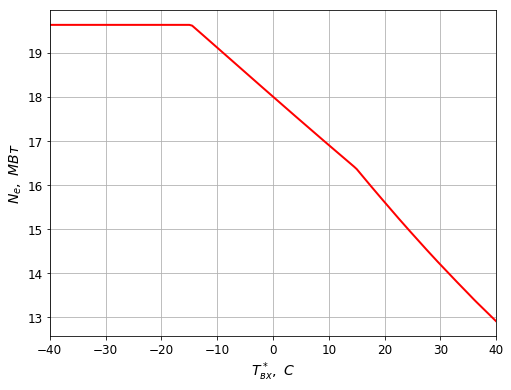

In [103]:
scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['N_e'] / 1e6, 
                            value_label=r'$N_e,\ МВт$', figsize=(8, 6), label_font=14, ticks_font=12, labels=True,
                            fname=os.path.join(config.plots_dir, '%s_N_e' % plot_prefix)
                        )

## График изменения эффективного КПД

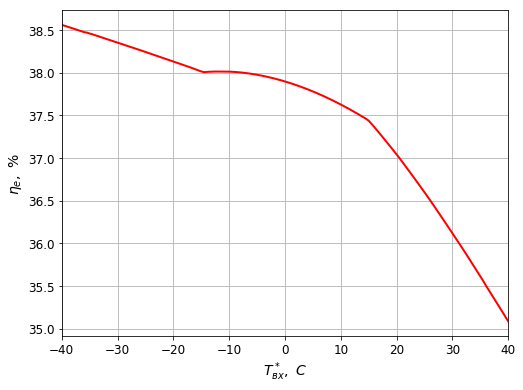

In [104]:
scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['eta_e'] * 100, 
                            value_label=r'$\eta_e,\ \%$', figsize=(8, 6), label_font=14, ticks_font=12, labels=True,
                            fname=os.path.join(config.plots_dir, '%s_eta_e' % plot_prefix)
                        )

## График изменения расхода уходящих газов

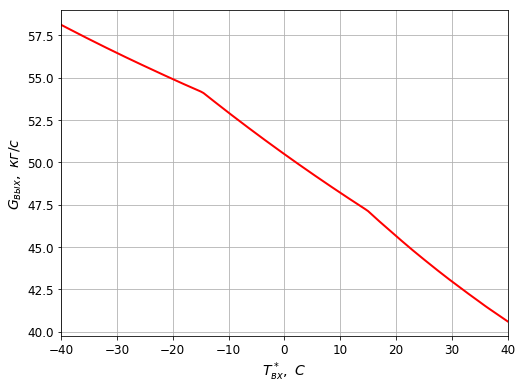

In [105]:
scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['G_out'], 
                            value_label=r'$G_{вых},\ кг/с$', figsize=(8, 6), label_font=14, ticks_font=12, labels=True,
                            fname=os.path.join(config.plots_dir, '%s_G_out' % plot_prefix)
                        )

## График изменения температуры уходящих газов

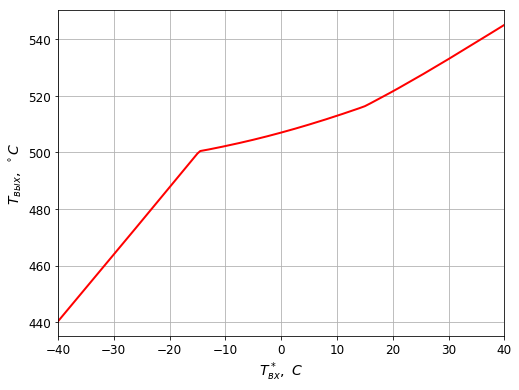

In [106]:
scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['T_out'] - 273, 
                            value_label=r'$T_{вых},\ ^\circ C$', figsize=(8, 6), label_font=14, ticks_font=12, labels=True,
                            fname=os.path.join(config.plots_dir, '%s_T_out' % plot_prefix)
                        )

## График изменения частоты вращения турбокомпрессора

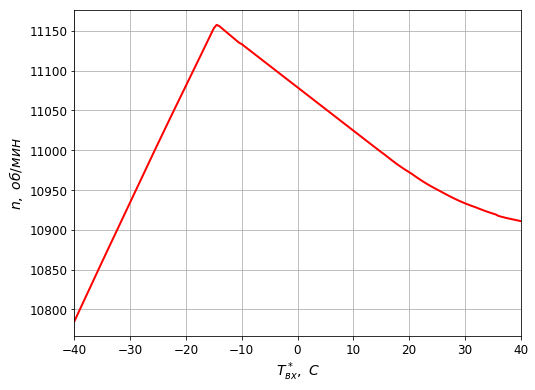

In [107]:
scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['n'], 
                            value_label=r'$n,\ об/мин$', figsize=(8, 6), label_font=14, ticks_font=12, labels=True,
                            fname=os.path.join(config.plots_dir, '%s_n' % plot_prefix))

## График зависимости КПД от мощности

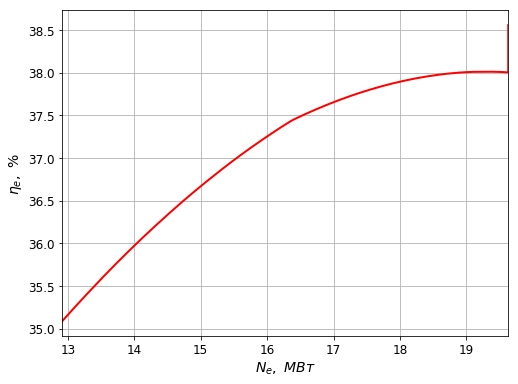

In [108]:
scheme.plot(value_x_arr=scheme.modes_params['N_e']/1e6, value_y_arr=scheme.modes_params['eta_e'] * 100, 
            xlabel=r'$N_e,\ МВт$', ylabel=r'$\eta_e,\ \%$', figsize=(8, 6), 
            label_font=14, ticks_font=12, labels=True,
            fname=os.path.join(config.plots_dir, '%s_eta_e_N_e' % plot_prefix))

## Линия режимов на характеристике компрессора

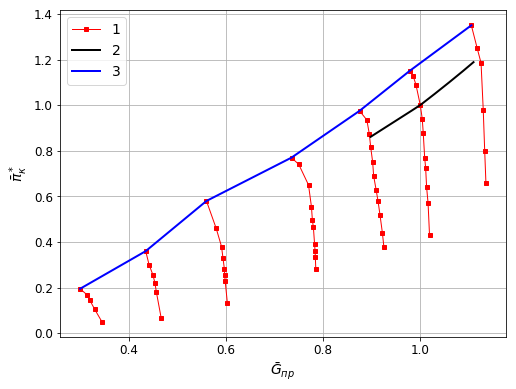

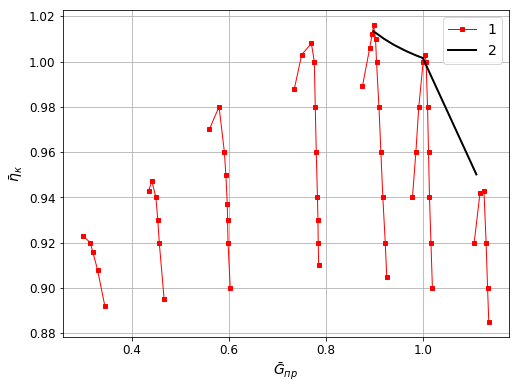

In [109]:
scheme.comp_model.characteristics.plot_modes_line(
    pi_c_stag_rel_arr=scheme.modes_params['pi_c_stag_rel'], 
    G_norm_rel_arr=scheme.modes_params['G_in_norm_rel'], 
    eta_c_stag_rel_arr=scheme.modes_params['eta_c_stag_rel'], figsize=(8, 6), 
    label_font=14, ticks_font=12, labels=True, legend_font=14,
    fname_base=os.path.join(config.plots_dir, '%s_mode_line' % plot_prefix)
)

## Таблица параметров 

In [110]:
modes_params = scheme.modes_params.copy().sort_values('T_stag_in')
modes_params['C_e'] = scheme.modes_params['C_e'] * 100
modes_params['N_e'] = scheme.modes_params['N_e'] / 1e6
params_round = modes_params.round({
    'pi_c_stag_rel': 3,
    'n_norm_rel': 3,
    'pi_t1_stag': 2,
    'pi_t2_stag': 2,
    'pi_t3_stag': 2,
    'T_stag_in': 1,
    'T_g_stag': 1,
    'g_fuel': 4,
    'G_fuel': 3,
    'N_e': 2,
    'C_e': 4,
    'eta_e': 3,
    'G_in_norm_rel': 3,
    'eta_c_stag_rel': 3,
    'G_c': 2,
    'eta_c_stag': 3,
    'pi_c_stag': 2,
    'n': 1,
    'G_out': 2,
    'T_out': 1
})
params_round = params_round.loc[
    (params_round.T_stag_in==233) |
    (params_round.T_stag_in==243) | (params_round.T_stag_in==253) | (params_round.T_stag_in==263) | 
    (params_round.T_stag_in==273) | (params_round.T_stag_in==283) | (params_round.T_stag_in==288) | 
    (params_round.T_stag_in==293) | (params_round.T_stag_in==303) | (params_round.T_stag_in==313)
]
params_round

,C_e,G_c,G_fuel,G_in_norm_rel,G_out,N_e,T_g_stag,T_out,T_stag_in,eta_c_stag,eta_c_stag_rel,eta_e,g_fuel,n,n_norm_rel,pi_c_stag,pi_c_stag_rel,pi_t1_stag,pi_t2_stag,pi_t3_stag
160,0.0193,59.53,1.052,1.109,58.12,19.63,1419.6,713.3,233.0,0.800,0.950,0.386,0.0177,10784.9,1.090,20.20,1.188,1.74,2.25,3.92
140,0.0194,57.80,1.057,1.100,56.46,19.63,1460.6,736.9,243.0,0.804,0.955,0.384,0.0183,10934.5,1.082,19.91,1.171,1.74,2.25,3.92
120,0.0195,56.18,1.064,1.091,54.92,19.63,1501.3,760.7,253.0,0.807,0.959,0.381,0.0189,11081.0,1.075,19.64,1.155,1.74,2.24,3.92
100,0.0196,54.13,1.039,1.072,52.93,19.11,1523.0,775.3,263.0,0.815,0.968,0.380,0.0192,11133.2,1.059,19.06,1.121,1.74,2.24,3.92
80,0.0196,51.64,0.981,1.042,50.48,18.00,1523.0,780.0,273.0,0.827,0.982,0.379,0.0190,11078.8,1.034,18.19,1.070,1.74,2.24,3.92
60,0.0198,49.32,0.928,1.013,48.20,16.90,1523.0,786.0,283.0,0.838,0.995,0.376,0.0188,11024.5,1.011,17.37,1.022,1.74,2.23,3.92
50,0.0199,48.21,0.903,0.999,47.12,16.36,1523.0,789.4,288.0,0.843,1.002,0.374,0.0187,10997.5,1.000,16.98,0.999,1.74,2.23,3.92
40,0.0201,46.71,0.871,0.976,45.65,15.61,1523.0,794.6,293.0,0.845,1.004,0.370,0.0186,10972.3,0.989,16.45,0.968,1.74,2.23,3.92
20,0.0206,43.98,0.812,0.935,42.97,14.19,1523.0,806.0,303.0,0.849,1.008,0.361,0.0185,10933.2,0.969,15.49,0.911,1.74,2.22,3.92
0,0.0212,41.57,0.760,0.898,40.60,12.91,1523.0,818.1,313.0,0.853,1.013,0.351,0.0183,10910.8,0.951,14.64,0.861,1.74,2.21,3.92


# Сохранение таблицы

In [111]:
params_round.to_csv(path_or_buf=os.path.join(config.output_dirname, 'var_mode_params1.csv'), 
                    columns=['T_stag_in', 'C_e', 'G_c', 'G_fuel', 'G_in_norm_rel', 'G_out', 'N_e', 'T_g_stag'])

params_round.to_csv(path_or_buf=os.path.join(config.output_dirname, 'var_mode_params2.csv'), 
                    columns=['T_stag_in', 'T_out', 'T_stag_in', 'eta_c_stag', 'eta_c_stag_rel', 'eta_e', 'g_fuel', 'n'])

params_round.to_csv(path_or_buf=os.path.join(config.output_dirname, 'var_mode_params3.csv'), 
                    columns=['T_stag_in', 'n_norm_rel', 'pi_c_stag', 'pi_c_stag_rel', 'pi_t1_stag', 'pi_t2_stag', 'pi_t3_stag'])

In [112]:
params_round.to_excel(excel_writer=os.path.join(config.output_dirname, 'var_mode_params.xlsx'),
                     columns=[
                        'T_stag_in', 'C_e', 'G_c', 'G_in_norm_rel', 'N_e', 'T_g_stag',
                        'eta_c_stag_rel', 'eta_e', 
                        'n', 'n_norm_rel', 'pi_c_stag', 'pi_c_stag_rel', 'pi_t1_stag',
                        'pi_t2_stag', 'pi_t3_stag'
                     ]
                )

# Графики для чертежа

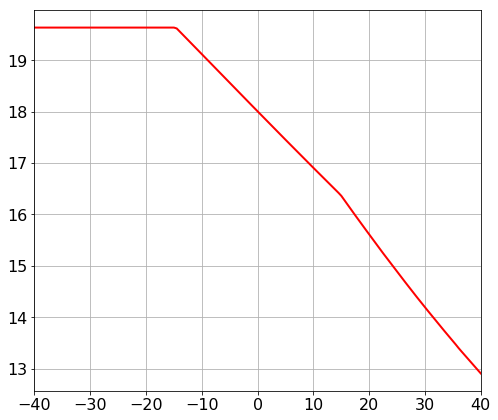

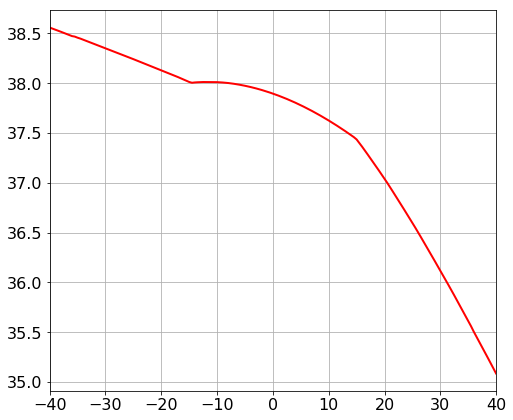

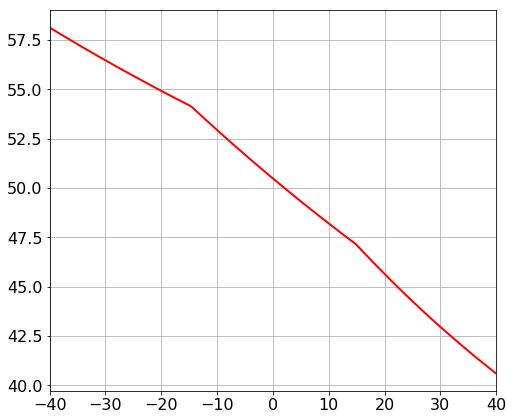

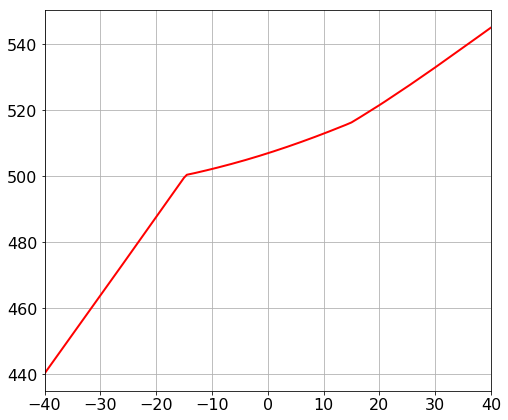

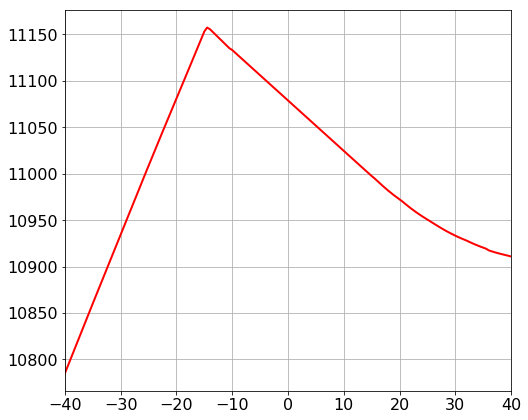

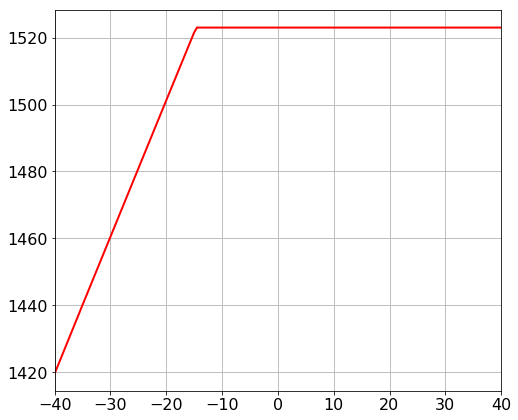

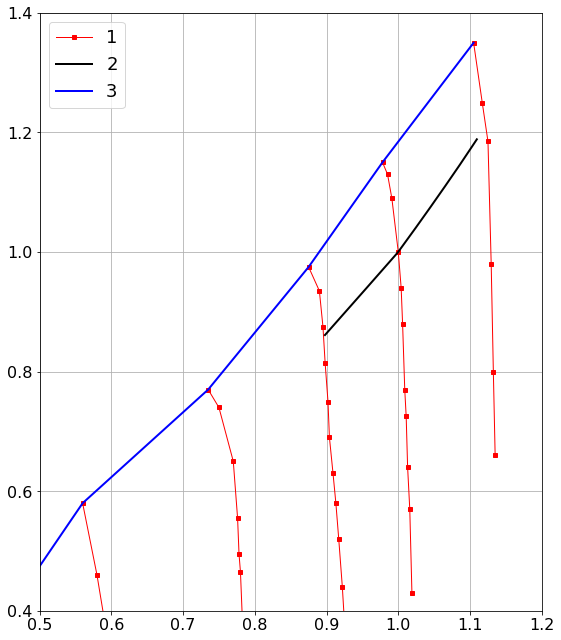

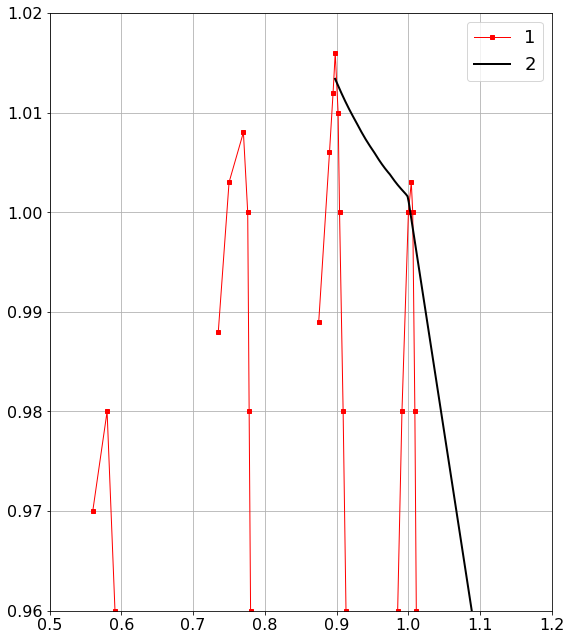

In [116]:
figsize=(8, 7)
scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['N_e'] / 1e6, 
                            value_label=r'$N_e,\ МВт$', figsize=figsize, label_font=14, ticks_font=16, labels=False,
                            fname=os.path.join(config.draw_plots_dir, '%s_N_e' % plot_prefix)
                        )

scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['eta_e'] * 100, 
                            value_label=r'$\eta_e,\ \%$', figsize=figsize, label_font=14, ticks_font=16, labels=False,
                            fname=os.path.join(config.draw_plots_dir, '%s_eta_e' % plot_prefix)
                        )

scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['G_out'], 
                            value_label=r'$G_{вых},\ кг/с$', figsize=figsize, label_font=14, ticks_font=16, labels=False,
                            fname=os.path.join(config.draw_plots_dir, '%s_G_out' % plot_prefix)
                        )

scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['T_out'] - 273, 
                            value_label=r'$T_{вых},\ ^\circ C$', figsize=figsize, label_font=14, ticks_font=16, labels=False,
                            fname=os.path.join(config.draw_plots_dir, '%s_T_out' % plot_prefix)
                        )

scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['n'], 
                            value_label=r'$n,\ об/мин$', figsize=figsize, label_font=14, ticks_font=16, labels=False,
                            fname=os.path.join(config.draw_plots_dir, '%s_n' % plot_prefix))

scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['T_g_stag'], 
                            value_label=r'$T_г^*,\ К$', figsize=figsize, label_font=14, ticks_font=16, labels=False,
                            fname=os.path.join(config.draw_plots_dir, '%s_T_g_stag' % plot_prefix))

scheme.comp_model.characteristics.plot_modes_line(
    pi_c_stag_rel_arr=scheme.modes_params['pi_c_stag_rel'], 
    G_norm_rel_arr=scheme.modes_params['G_in_norm_rel'], 
    eta_c_stag_rel_arr=scheme.modes_params['eta_c_stag_rel'], figsize=(9, 11), 
    label_font=14, ticks_font=16, legend_font=18, labels=False, G_lim=(0.5, 1.2), pi_c_lim=(0.4, 1.4), eta_c_lim=(0.96, 1.02),
    fname_base=os.path.join(config.draw_plots_dir, '%s_mode_line' % plot_prefix)
)